In [553]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from prettytable import PrettyTable
import plotly.graph_objects as go
from scipy.stats import skew
import matplotlib.pyplot as plt
plt.style.use('ggplot')


fifa = pd.read_excel(r"R:\Rohit 2.0\StFx\1. Big Data\Project\Report 1\Report_1\Subset of Data(100 columns).xlsx")

In [554]:
fifa.head()

,player_id,short_name,player_positions,overall,potential,wage_eur,age,dob,height_cm,weight_kg,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,192985,K. De Bruyne,"CM, CAM",91,91,350000,31,1991-06-28,181,75,...,79+3,79+3,79+3,78+3,74+3,68+3,68+3,68+3,74+3,21+3
1,209331,M. Salah,RW,90,90,270000,30,1992-06-15,175,71,...,68+3,68+3,68+3,71+3,67+3,58+3,58+3,58+3,67+3,22+3
2,20801,Cristiano Ronaldo,ST,89,89,210000,37,1985-02-05,187,83,...,58+3,58+3,58+3,61+3,57+3,52+3,52+3,52+3,57+3,20+3
3,200145,Casemiro,CDM,89,89,240000,30,1992-02-23,185,84,...,86+3,86+3,86+3,81+3,82+3,87+2,87+2,87+2,82+3,21+3
4,202126,H. Kane,ST,89,89,240000,28,1993-07-28,188,89,...,68+3,68+3,68+3,67+3,63+3,61+3,61+3,61+3,63+3,20+3


In [555]:
fifa = fifa.rename(columns={'international_reputation': 'int_reputation'})
pd.set_option('display.max.rows',10)
fifa = fifa.drop_duplicates()

In [556]:
overall_mean=round(fifa['overall'].mean(),2)
overall_mean

84.22

In [557]:
age_mean=round(fifa['age'].mean(),2)
age_mean

27.82

In [558]:
wage_mean=round(fifa['wage_eur'].mean(),2)
wage_mean

140932.69

In [559]:
overall_range_min = fifa['overall'].min()
overall_range_max=fifa['overall'].max()
overall_range_min,overall_range_max

(81, 91)

In [560]:
age_range_min,age_range_max=round(fifa['age'].min()), round(fifa['age'].max())
age_range_min,age_range_max

(20, 37)

In [561]:
wage_range_min,wage_range_max=round(fifa['wage_eur'].min()), round(fifa['wage_eur'].max())
wage_range_min,wage_range_max

(39000, 350000)

In [562]:
overall_mode = fifa['overall'].sort_values(ascending=True)
overall_mode=round(fifa['overall'].mode(),2)[0]
overall_mode

83

In [563]:
age_mode = fifa['age'].sort_values(ascending=True)
age_mode=round(fifa['age'].mode(),2)[0]
age_mode

28

In [564]:
wage_mode = fifa['wage_eur'].sort_values(ascending=True)
wage_mode=round(fifa['wage_eur'].mode(),2)[0]
wage_mode

120000

In [565]:
overall_skewness_data = fifa['overall'].dropna().sort_values(ascending=True)
overall_skewness=round(skew(overall_skewness_data),2)
overall_skewness

0.72

In [566]:
age_skewness_data = fifa['age'].dropna().sort_values(ascending=True)
age_skewness=round(skew(age_skewness_data),2)
age_skewness

0.31

In [567]:
wage_skewness_data = fifa['wage_eur'].dropna().sort_values(ascending=True)
wage_skewness=round(skew(wage_skewness_data),2) 
wage_skewness

0.81

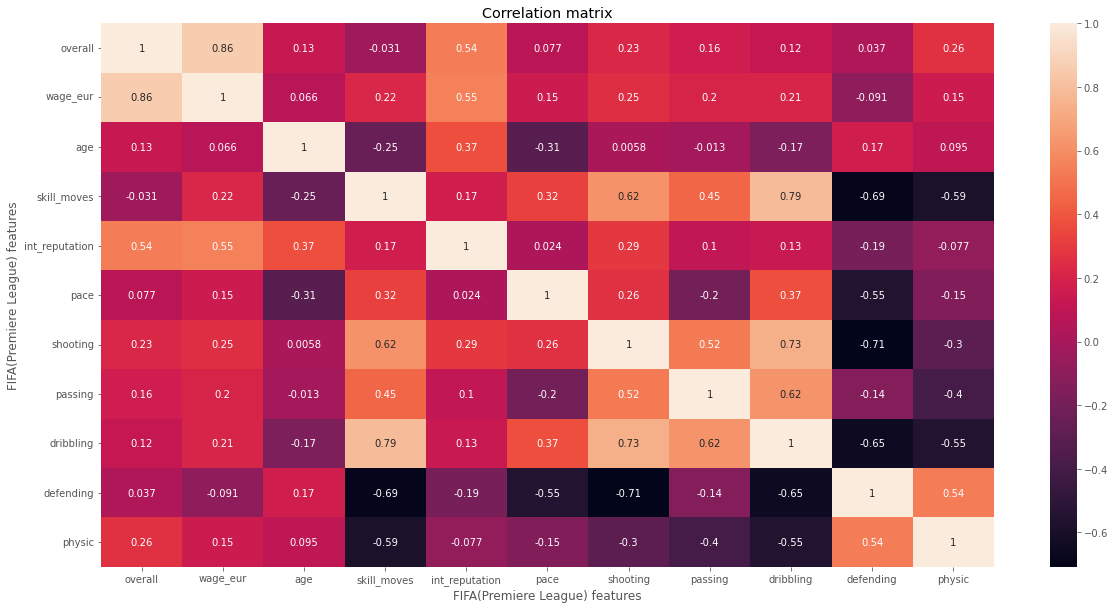

In [568]:
#CORRELATION MATRIX

selected_columns = ['overall', 'wage_eur', 'age', 'skill_moves', 'int_reputation', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
required_fifa = fifa[selected_columns]

correlation_matrix = required_fifa.corr(method ='pearson')
#correlation_matrix = required_fifa.corr(method ='spearman')

plt.figure(figsize=(20, 10)) 
sns.heatmap(correlation_matrix, annot = True)
plt.xticks(rotation=0)

plt.title("Correlation matrix")
plt.xlabel("FIFA(Premiere League) features")
plt.ylabel("FIFA(Premiere League) features")

plt.savefig('Correlation.png')
plt.show()

In [569]:
correlation_to_pairs = required_fifa.corr()
correlation_to_pairs= correlation_to_pairs .unstack()
sorted_correlation_to_pairs = correlation_to_pairs.sort_values(kind="quicksort")
sorted_correlation_to_pairs
pd.set_option('display.max_row', 10)
good_correlation_pairs = sorted_correlation_to_pairs[abs(sorted_correlation_to_pairs) > 0.5] 
good_correlation_pairs = good_correlation_pairs[abs(sorted_correlation_to_pairs) !=1]
pd.set_option('display.max.rows',len(good_correlation_pairs))


In [570]:
int_overall=round(correlation_to_pairs['int_reputation']['overall'],2)
int_overall

0.54

In [571]:
int_age=round(correlation_to_pairs['int_reputation']['age'],2)
int_age

0.37

In [572]:
int_wage=round(correlation_to_pairs['int_reputation']['wage_eur'],2)
int_wage

0.55

In [573]:
table = PrettyTable()
table.field_names = ['', 'Overall', 'Age','Wage']
table.add_row(['Range','[{},{}]'.format(overall_range_min,overall_range_max) , '[{},{}]'.format(age_range_min,age_range_max),'[{},{}]'.format(wage_range_min,wage_range_max)])
table.add_row(['Mean', overall_mean, age_mean,wage_mean])
table.add_row(['Mode', overall_mode,age_mode,wage_mode])
table.add_row(['Skewness',overall_skewness, age_skewness,wage_skewness])
table.add_row(['Correlation(WRT International Reputation)',int_overall,int_age,int_wage])
print('ANALYSIS')
print(table)

ANALYSIS
+-------------------------------------------+---------+---------+----------------+
|                                           | Overall |   Age   |      Wage      |
+-------------------------------------------+---------+---------+----------------+
|                   Range                   | [81,91] | [20,37] | [39000,350000] |
|                    Mean                   |  84.22  |  27.82  |   140932.69    |
|                    Mode                   |    83   |    28   |     120000     |
|                  Skewness                 |   0.72  |   0.31  |      0.81      |
| Correlation(WRT International Reputation) |   0.54  |   0.37  |      0.55      |
+-------------------------------------------+---------+---------+----------------+


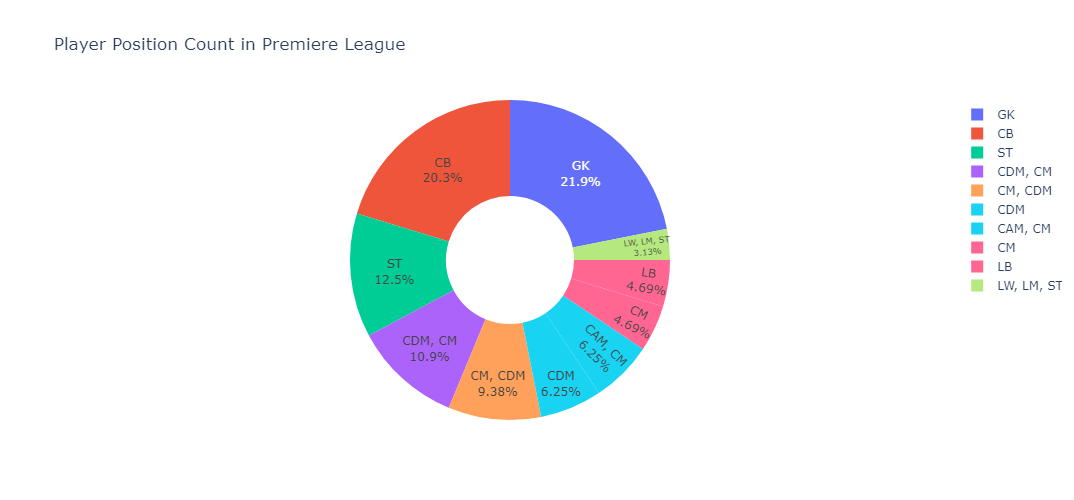

<Figure size 432x288 with 0 Axes>

In [574]:
#Visualization starts
#DONUT GRAPH

position_count=fifa.groupby('player_positions').apply(lambda x:x['short_name'].count()).reset_index(name='Counts')
position_count.sort_values(by='Counts',ascending=False,inplace=True)
top_10_nat_cnt=position_count[:10]

fig = px.pie(top_10_nat_cnt, names='player_positions', values='Counts', title='Player Position Count in Premiere League', hole=0.4, color='Counts')

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    height=500
)

plt.savefig('Player_Position.png')
fig.show()

<Figure size 800x600 with 0 Axes>

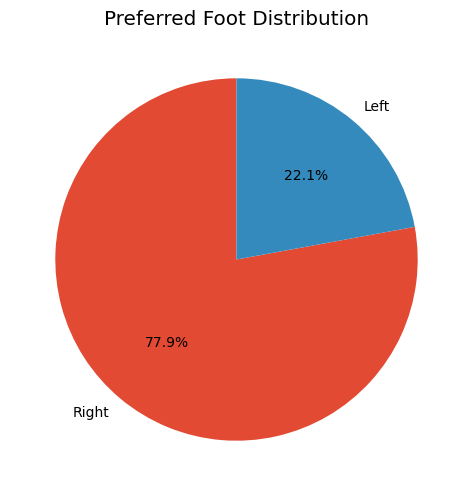

In [575]:
#PIE CHART

foot_count = fifa.groupby('preferred_foot').apply(lambda x: x['short_name'].count()).reset_index(name='Count')
foot_count.sort_values(by='Count', ascending=False, inplace=True)

plt.figure(figsize=(8, 6), dpi=100)
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(1, 1, 1)
ax.pie(foot_count['Count'], labels=foot_count['preferred_foot'], autopct='%1.1f%%', startangle=90)
ax.set_title("Preferred Foot Distribution")

plt.savefig('Preferred_Foot.png')
plt.show()

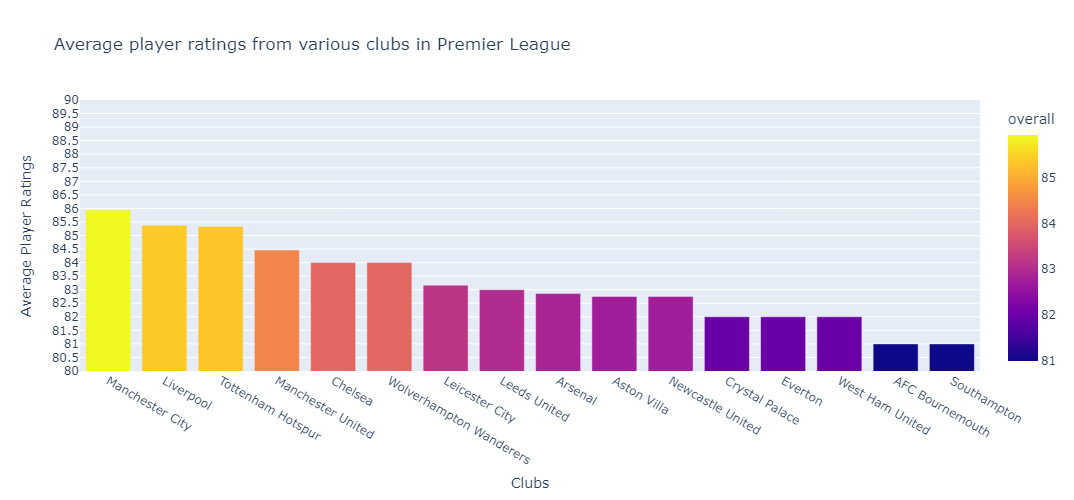

In [576]:
#BAR GRAPH

club_mean = fifa.groupby('club_name')['overall'].mean().reset_index()
club_mean_sorted = club_mean.sort_values(by='overall', ascending=False)
 
fig = px.bar(club_mean_sorted, x='club_name', y='overall',color='overall', title='Average player ratings from various clubs in Premier League')

fig.update_layout(
    height=500,
    yaxis=dict(
        range=[80, 90], 
        dtick=0.5  
    ),
    yaxis_title="Average Player Ratings",xaxis_title="Clubs"
)
fig.show()

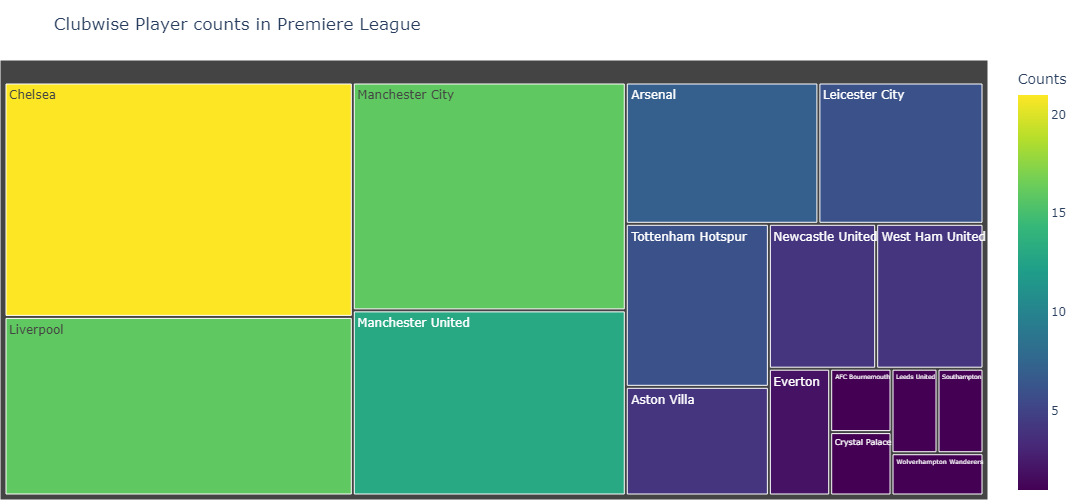

<Figure size 432x288 with 0 Axes>

In [577]:
#TREE MAP

club_count=fifa.groupby('club_name').apply(lambda x:x['short_name'].count()).reset_index(name='Counts')
club_count.sort_values(by='Counts',ascending=False,inplace=True)

fig = px.treemap(club_count, 
                 path=['club_name'], 
                 values='Counts',
                 color='Counts',
                 color_continuous_scale='Viridis',
                 title='Clubwise Player counts in Premiere League')

fig.update_layout(
    margin=dict(t=60, l=0, r=0, b=0),
    width=1050,  
    height=500
)
plt.savefig('Club_Count.png')
fig.show()

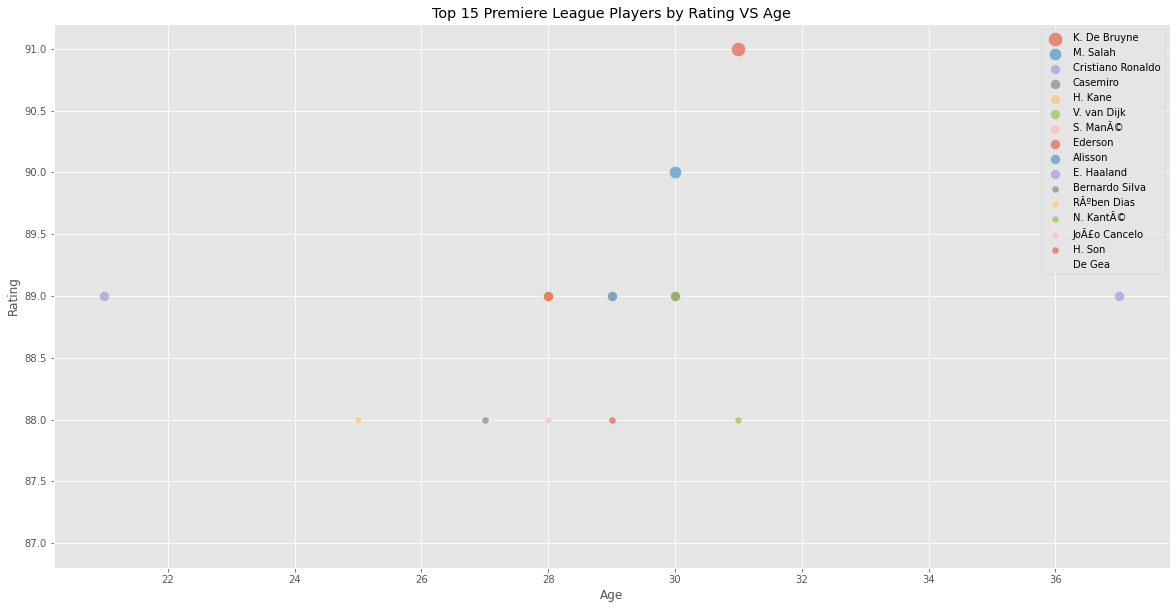

In [578]:
#BUBBLE CHART

top_15_players = fifa.sort_values(by='overall', ascending=False).head(16)

scaling_factor = 50
plt.figure(figsize=(20, 10))

x = top_15_players['age']
y = top_15_players['overall']
bubble_size = (top_15_players['overall'] - top_15_players['overall'].min()) / (top_15_players['overall'].max() - top_15_players['overall'].min()) * 200  # Scale bubble size based on rating
name = top_15_players['short_name']

for i, name in enumerate(name):
    plt.scatter(
        x.iloc[i],
        y.iloc[i],
        s=bubble_size.iloc[i],
        label=name,
        alpha=0.6,
        edgecolors='w'
    )

plt.title("Top 15 Premiere League Players by Rating VS Age")
plt.xlabel("Age")
plt.ylabel("Rating")
plt.legend()


plt.savefig('top_15.png')
plt.show()

pace         80.0
shooting     91.0
passing      76.0
dribbling    84.0
defending    34.0
physic       73.0
Name: 2, dtype: object


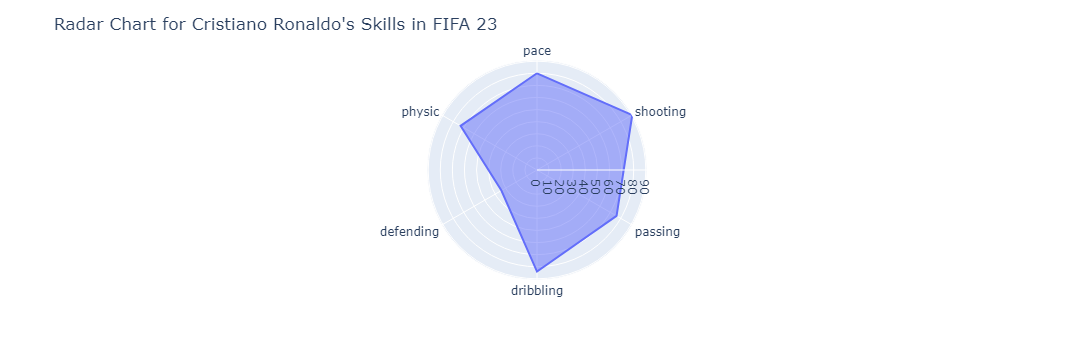

<Figure size 432x288 with 0 Axes>

In [579]:
#RADOR N-GON GRAPH

skills=['pace','shooting','passing','dribbling','defending','physic']      
player_stats = fifa.loc[2, skills]
print(player_stats)
    
fig = px.line_polar(player_stats, r=player_stats.values, theta=skills, line_close=True)

fig.update_traces(fill='toself')  
fig.update_layout( polar=dict(radialaxis=dict(visible=True,),), showlegend=False,
title="Radar Chart for Cristiano Ronaldo's Skills in FIFA 23")

plt.savefig('Radar_Chart.png')
fig.show()
    